In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

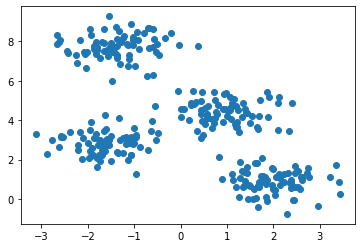

In [7]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

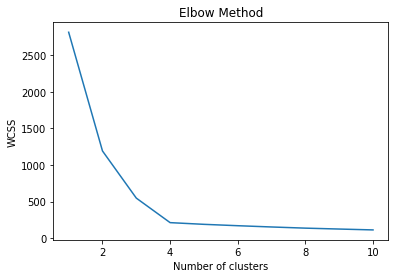

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

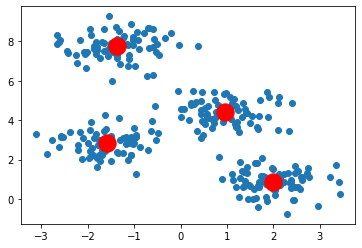

In [9]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# **Another Example** 

In [11]:
from sklearn.datasets import make_blobs
import pandas as pd

dataset, classes = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=0)
# make as panda dataframe for easy understanding
df = pd.DataFrame(dataset, columns=['var1', 'var2'])
df.head(2)


,var1,var2
0,2.204387,1.560857
1,-1.133740,2.684673


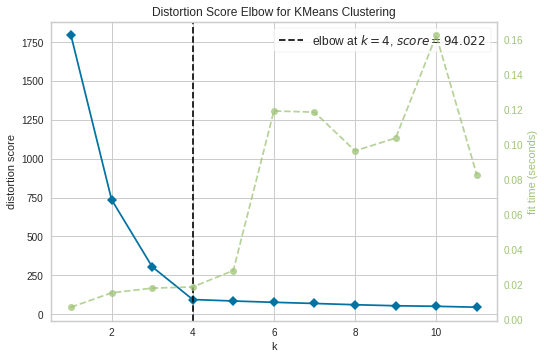

In [12]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)

In [19]:
kmeans.labels_  # same as kmeans.predict(df)

array([1, 0, 3, 2, 1, 3, 0, 3, 3, 3, 3, 1, 0, 0, 1, 3, 2, 2, 2, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 3, 2, 3, 0, 1, 0, 3, 0, 3, 3, 2, 2, 2, 2, 3,
       1, 0, 3, 2, 2, 3, 2, 0, 0, 2, 3, 2, 0, 1, 3, 1, 2, 3, 1, 3, 2, 3,
       1, 2, 0, 0, 1, 1, 3, 3, 0, 2, 0, 0, 1, 1, 2, 3, 1, 0, 0, 3, 3, 1,
       0, 0, 2, 2, 2, 3, 3, 1, 0, 2, 3, 3, 2, 1, 1, 2, 2, 0, 3, 1, 1, 3,
       2, 0, 0, 1, 1, 3, 0, 0, 2, 3, 2, 0, 3, 1, 3, 0, 3, 0, 1, 3, 0, 1,
       0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 3, 1, 0, 2, 2, 2, 3, 0,
       1, 3, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 3, 1, 1, 0, 1, 3, 0, 2, 2, 2,
       3, 3, 0, 3, 0, 1, 3, 1, 3, 0, 0, 2, 3, 2, 1, 1, 3, 2, 0, 0, 0, 3,
       2, 1], dtype=int32)

In [20]:
kmeans.inertia_

94.02242630751758

In [21]:
kmeans.n_iter_

2

In [22]:
kmeans.cluster_centers_

array([[-1.60782913,  2.9162828 ],
       [ 2.06911036,  0.96146833],
       [-1.33173192,  7.7400479 ],
       [ 0.91932803,  4.34824615]])

In [23]:
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 50, 1: 50, 2: 50, 3: 50})

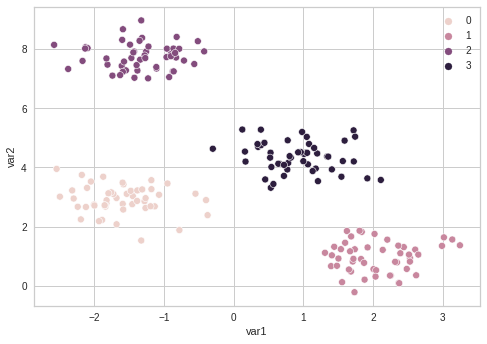

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.show()

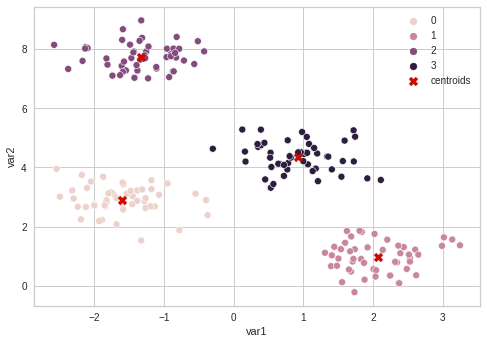

In [25]:
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()